# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Set Unit counter to devine metric of weather

units = "metric"


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | bomdila
Processing Record 3 of Set 1 | polyarnyy
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | tayu
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | manokwari
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | troitskoye
Processing Record 11 of Set 1 | lincoln city
Processing Record 12 of Set 1 | newman
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | okha
Processing Record 15 of Set 1 | jackson
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | kargil
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | port elizabeth
Processing Record 23 of Set 1 | a

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.5649,-52.7093,23.42,92,100,0.45,CA,1722792949
1,bomdila,27.2500,92.4000,11.82,99,100,0.98,IN,1722792953
2,polyarnyy,69.1989,33.4478,11.89,73,2,3.31,RU,1722792954
3,margaret river,-33.9500,115.0667,14.42,74,92,6.53,AU,1722792956
4,tayu,-6.5397,111.0518,24.01,82,41,3.80,ID,1722792957


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,23.42,92,100,0.45,CA,1722792949
1,bomdila,27.2500,92.4000,11.82,99,100,0.98,IN,1722792953
2,polyarnyy,69.1989,33.4478,11.89,73,2,3.31,RU,1722792954
3,margaret river,-33.9500,115.0667,14.42,74,92,6.53,AU,1722792956
4,tayu,-6.5397,111.0518,24.01,82,41,3.80,ID,1722792957


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

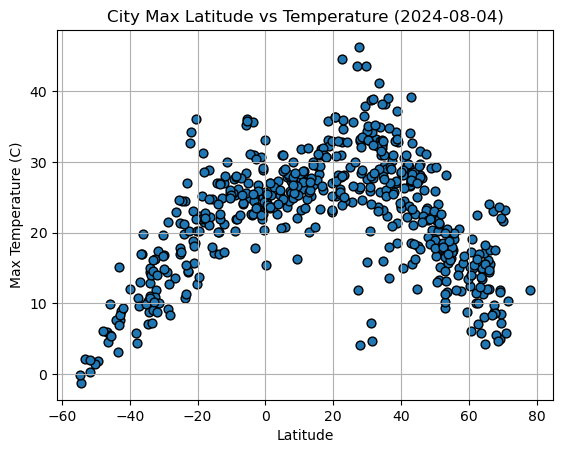

In [23]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", s=40, edgecolor = "k", grid=True)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2024-08-04)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
          

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

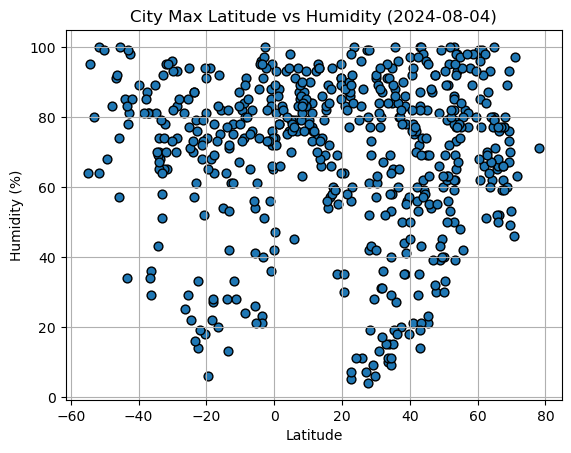

In [25]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", s=40, edgecolor = "k", grid=True)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity (2024-08-04)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
          

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

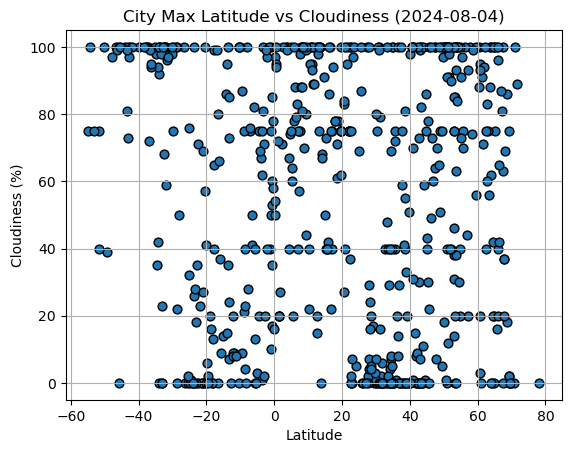

In [27]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", s=40, edgecolor = "k", grid=True)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Cloudiness (2024-08-04)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
          

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

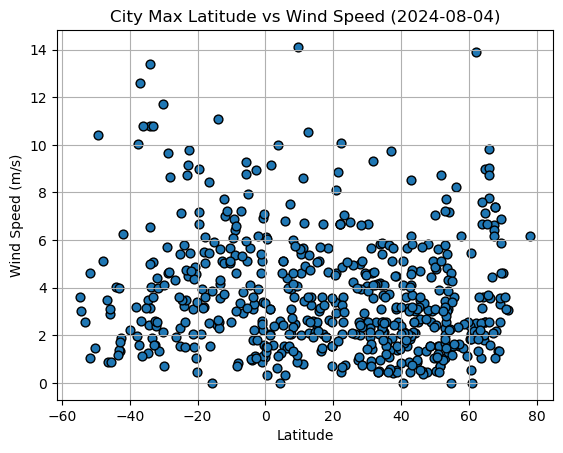

In [29]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", s=40, edgecolor = "k", grid=True)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Wind Speed (2024-08-04)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
          

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_value = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(5.8,0.8),fontsize=20,color="red")
    plt.plot(x_values, regress_value, "-r")
    plt.scatter(x_values, y_values)
  
    
    print("The r^2-value is: " + str(rvalue))

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,23.42,92,100,0.45,CA,1722792949
1,bomdila,27.2500,92.4000,11.82,99,100,0.98,IN,1722792953
2,polyarnyy,69.1989,33.4478,11.89,73,2,3.31,RU,1722792954
5,utrik,11.2278,169.8474,28.34,77,95,5.65,MH,1722792958
7,anadyr,64.7500,177.4833,4.28,100,100,9.00,RU,1722792960


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,margaret river,-33.9500,115.0667,14.42,74,92,6.53,AU,1722792956
4,tayu,-6.5397,111.0518,24.01,82,41,3.80,ID,1722792957
6,manokwari,-0.8667,134.0833,25.11,85,100,2.60,ID,1722792959
8,blackmans bay,-43.0167,147.3167,7.63,78,73,1.34,AU,1722792961
16,papatowai,-46.5619,169.4708,5.97,91,100,3.48,NZ,1722792970


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.5767383851082881


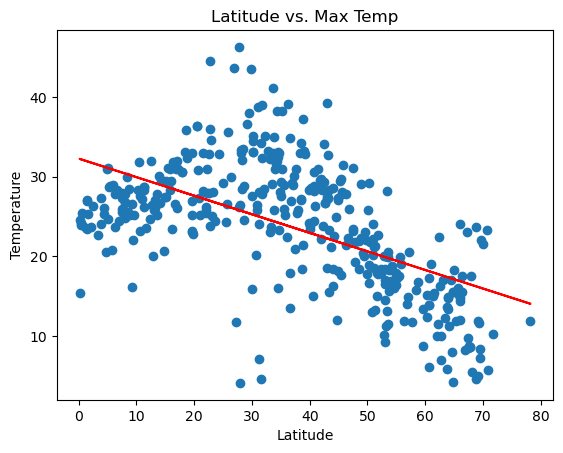

In [37]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


plt.title("Latitude vs. Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()


The r^2-value is: 0.8397294608982859


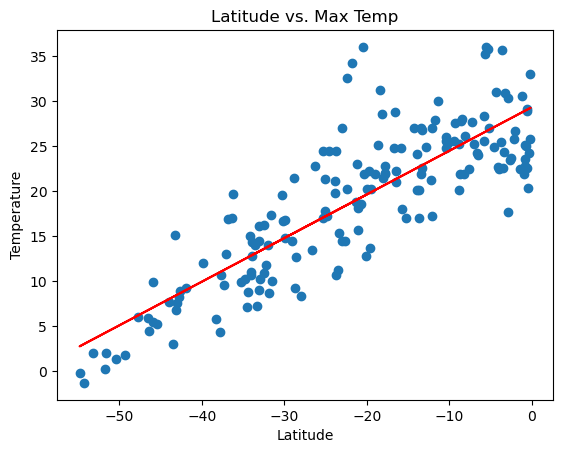

In [38]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])


plt.title("Latitude vs. Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

**Discussion about the linear relationship:**  There is a strong relationship between in both the northern and southern hemispheres when it comes to max temperature compared to latitude.  The higher the latitude the hotter the temperature of the city.  The r^2 value for the southern hemisphere is .839 which is relatively close to 1, and the northern hemisphere r^2 value is -0.57. The southern hemisphere does have a stronger corrleation than the northern hemisphere. If the r^2 value was 1 then the regression would perfectly fit the data.   

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.05501466524127881


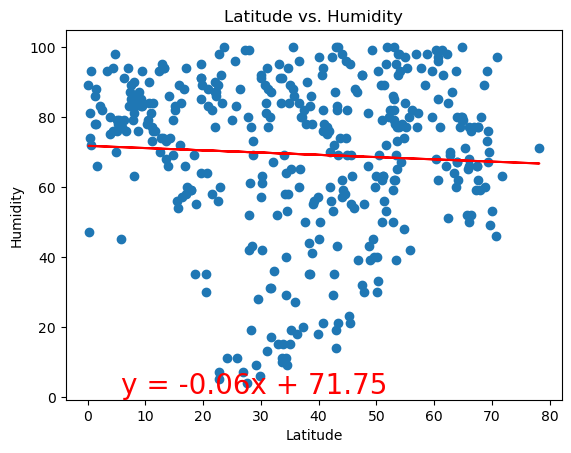

In [39]:
# Northern Hemisphere Latitude vs Humidity
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.title("Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r^2-value is: -0.14755515154471185


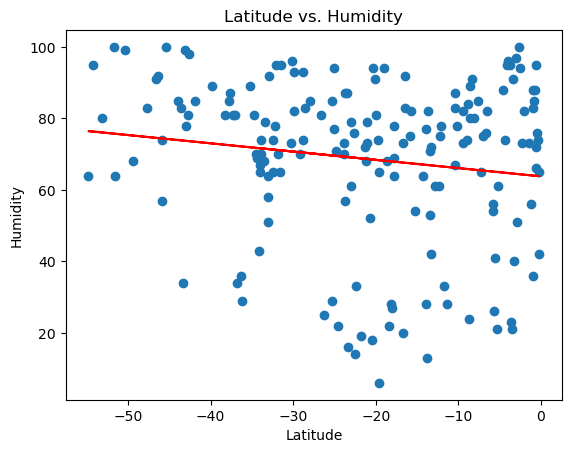

In [40]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.title("Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** There is little to no correlation between the latitude and humidity value. This is due to the r^2 value for the southern hemisphere being  -0.147 which is incredible close to 0.  While the r^2 value for the northern hemisphere is -0.055 also indicating a weak relationship between the humidity and the latitude.  

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.10991471251364568


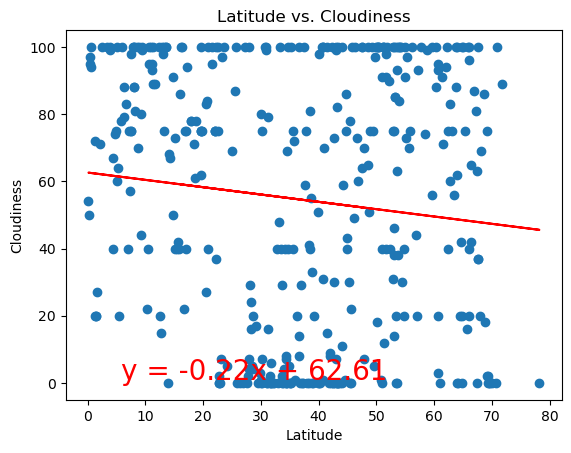

In [41]:
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.title("Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r^2-value is: -0.31540850359441325


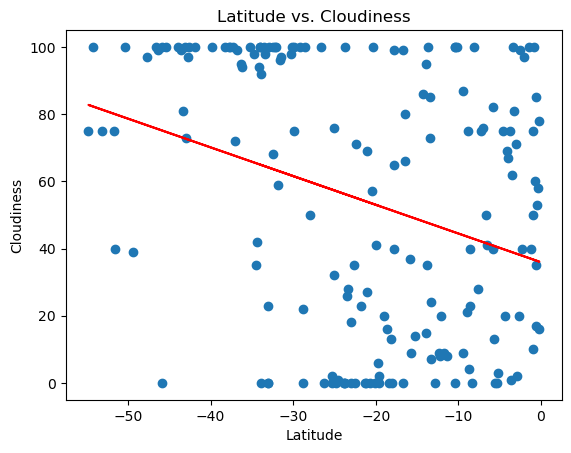

In [42]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.title("Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** There is weak correlation between latitude and cloudiness due to r^2 values being far away from 1.  The r^2 value for the northern hemisphere is -0.109 while the southern hemisphere -0.315.  These values indicate that latitude and cloudiness are very weakly correlated. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0060324530280889905


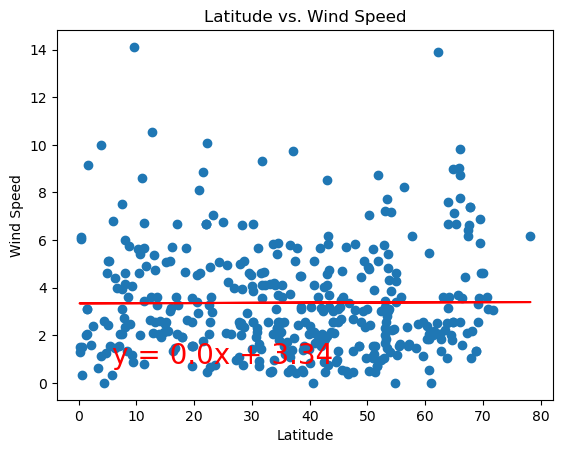

In [43]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.title("Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r^2-value is: 0.03400338546018795


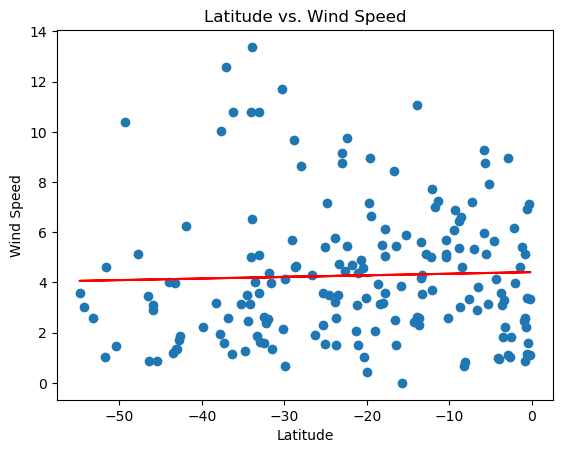

In [44]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.title("Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** There is little to no correlation between the latitude and the windspeed in either the northern or southern hemispheres.  The northern hemisphere has a r^2 value of 0.006, and the southern hemisphere 0.034.  The southern hemisphere is slightly more correlated then the northern hemisphere. All together the wind speed and latitude are not very corrlated with each other. 